<a href="https://colab.research.google.com/github/angelinasokol/AppsJava/blob/main/GraphModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


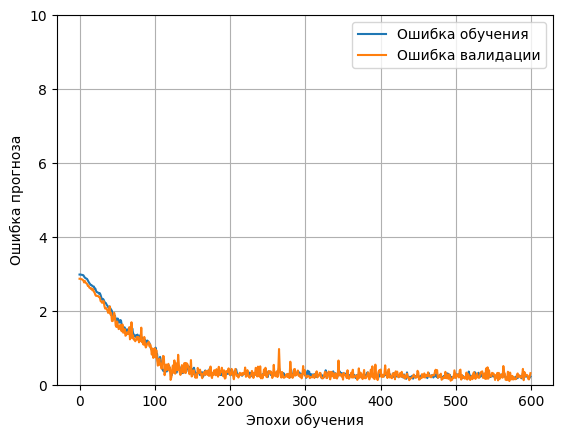

Ошибка модели на тестовых данных: 0.3296516537666321
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


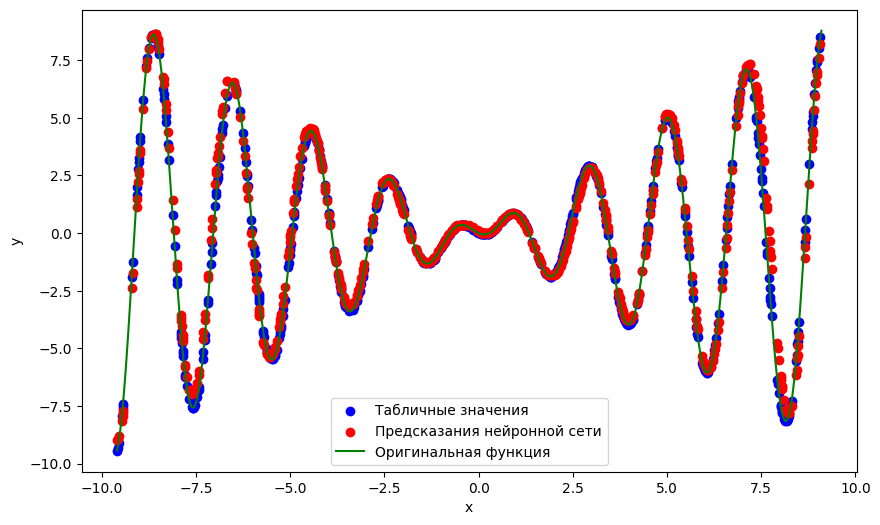

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

def target_function(x):
    return np.cos(3 * x - 15) * x


# Промежуток нахождения решения
x_values = np.linspace(-9.6, 9.1, 3000)

# Объединяем
y_values = target_function(x_values)

# Визуализируем прогресс обучения
data = pd.DataFrame({'x': x_values, 'y': y_values})

# Разделение данных на обучающие и тестовые наборы
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

# Отделение метки от значений данных
train_features = train_data[['x']]
test_features = test_data[['x']]

train_labels = train_data['y']
test_labels = test_data['y']

# Нормализация данных
normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(np.array(train_features))

# Создание модели нейронной сети
def build_and_compile_model(norm):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(90, activation='relu'),  # Два скрытых, нелинейных слоя
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1)  # Линейный слой с одним выходом
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='mean_absolute_error')  # Используем среднюю абсолютную ошибку как функцию потерь
    return model

# Нормализация
dnn_model = build_and_compile_model(normalizer)

# Обучение модели с помощью Keras
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=600
)

# Построение графика ошибки обучения
def plot_loss(history):
    plt.plot(history.history['loss'], label='Ошибка обучения')
    plt.plot(history.history['val_loss'], label='Ошибка валидации')
    plt.ylim([0, 10])
    plt.xlabel('Эпохи обучения')
    plt.ylabel('Ошибка прогноза')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

# Сбор результате на тестовом наборе
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)
print(f'Ошибка модели на тестовых данных: {test_results}')

# Выполнение прогноза
test_predictions = dnn_model.predict(test_features).flatten()

# График с истинными и предсказанными значениями и предсказанны
plt.figure(figsize=(10, 6))
plt.scatter(test_features, test_labels, label='Табличные значения', color='blue')
plt.scatter(test_features, test_predictions, label='Предсказания нейронной сети', color='red')
plt.plot(x_values, target_function(x_values), label='Оригинальная функция', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
